
# Detecting COVID-19 from Chest CT Scans


As the Coronavirus Disease 2019 (COVID-19) pandemic continues to grow globally, testing to detect COVID-19 and isolating individuals who test positive remains to be the primary strategy for preventing community spread of the disease. The current gold standard method of testing for COVID-19 is the reverse transcription polymerase chain reaction (RT-PCR) test. The RT-PCR test, however, has an imperfect sensitivity (around 70%) and is in short supply, particularly in resource-limited countries. Therefore, automatic and accurate detection of COVID-19 using medical imaging modalities, such as Computed Tomography (CT), can be beneficial as an alternative diagnostic tool.

The goal is to develop Convolutional Neural Networks to automatically detect the subtle signs of COVID-19 infection in patients' lungs from CT images. Our dataset contains 1010 CT scans from individuals with COVID-19 and 1010 CT scans from patients with other pulmonary diseases (non-COVID-19). These data have been collected from real patients in hospitals from Sao Paulo, Brazil. 

Our training and validation sets include 1600 and 420 CT images, respectively (half COVID-19, half non-COVID-19). Given the small size of the original dataset, I did not set aside any images for the test set. We will use the validation accuracy to evaluate our models. This is OK since we are not going to use the validation performance as a feedback signal to fine tune the hyperparameters of our models. 


![ct-covid](https://www.dropbox.com/s/r9lld9dj7875rsw/ct-covid.jpg?dl=1)


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Go to the link and copy the authorization code

Mounted at /content/drive


In [ ]:
# Define directories of where the training and validation sets reside
base_dir = '/covid19_ct'


In [ ]:
import os

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Training Data
train_covid  = os.path.join(train_dir, 'COVID')
train_noncovid     = os.path.join(train_dir, 'non-COVID')

# Validation Data
val_covid  = os.path.join(validation_dir, 'COVID')
val_noncovid     = os.path.join(validation_dir, 'non-COVID')


Use the code below to check how many images are available for each class in the training and validation sets.

In [ ]:
#Testing number of images in the training set
print('Total training covid images:', len(os.listdir(train_covid)))
print('Total training noncovid images:', len(os.listdir(train_noncovid)))

Total training covid images: 800
Total training noncovid images: 800


In [ ]:
#Testing number of images in the validation set
print('Total validation covid images:', len(os.listdir(val_covid)))
print('Total validation noncovid images:', len(os.listdir(val_noncovid)))

Total validation covid images: 210
Total validation noncovid images: 210


## Question 1. Build a simple CNN from scratch (50 pts)

Built a simple CNN. Include 3 convolution and 3 max-pooling layers. In convolution layers 1, 2, and 3, include 32, 64, and 64 filters, respectively. Using 3x3 filters, 2x2 pooling windows, and ReLU activation functions.Use of an input shape of 64x64. Included a dense layer with 128 nodes on top along with an appropriate output layer. Compile the model using `RMSProp` optimizer and use a learning rate of `0.00005`. Following the `accuracy` metric during training.

For data preprocessing, using the `ImageDataGenerator` tool in Keras. Creating `train_datagen` and `validation_datagen` generators that rescale the images appropriately. 

Defining a training set generator and validation set generator using the generators `train_datagen` and `validation_datagen` and the `.flow_from_directory` method. Specifying the `target_size` (it should match the input size above), setting the `batch_size` to 32 and choosing an appropriate `class_mode`. Training the model for 50 epochs. 

When training is complete, plotting the training and validation loss and accuracy. 

Building the basic model without any regularization

In [ ]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
# Build the model
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=0.00005),
               metrics=['accuracy'])

Next, we use ImageDataGenerator to automatically and quickly read the images, decode them into RGB grids of pixels, convert them into floating point tensors, rescale the pixel values to be between 0 and 1, and create batches of data for training and validation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the directory where our training data reside
        train_dir,
        # We want all images to be resized to 64x 64
        target_size=(64, 64),
        # Telling the data generator to prepare data in batches of size 32
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
        # Note: If our problem was a multi-class single-label classification, 
        # we would use categorical_crossentropy loss and set class_mode to 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Now, we are ready to train our model using `model.fit` and train the model to 50 epochs.

In [ ]:
model1_history = model1.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator)

Epoch 1/50
50/50 [==============================] - 9s 189ms/step - loss: 0.6791 - accuracy: 0.5987 - val_loss: 0.6552 - val_accuracy: 0.5381
Epoch 2/50
50/50 [==============================] - 9s 183ms/step - loss: 0.6500 - accuracy: 0.6656 - val_loss: 0.6219 - val_accuracy: 0.6000
Epoch 3/50
50/50 [==============================] - 9s 183ms/step - loss: 0.6168 - accuracy: 0.6975 - val_loss: 0.5783 - val_accuracy: 0.6738
Epoch 4/50
50/50 [==============================] - 9s 189ms/step - loss: 0.5846 - accuracy: 0.7181 - val_loss: 0.5187 - val_accuracy: 0.8095
Epoch 5/50
50/50 [==============================] - 9s 185ms/step - loss: 0.5530 - accuracy: 0.7381 - val_loss: 0.4873 - val_accuracy: 0.8048
Epoch 6/50
50/50 [==============================] - 9s 182ms/step - loss: 0.5320 - accuracy: 0.7581 - val_loss: 0.4779 - val_accuracy: 0.7762
Epoch 7/50
50/50 [==============================] - 9s 184ms/step - loss: 0.5149 - accuracy: 0.7769 - val_loss: 0.4712 - val_accuracy: 0.7714
Epoch 

In [ ]:
#saving the model to local directory
model1.save("/covid19_ct/Covid_model1.h5")


Plotting the loss of the model on training and validation datasets

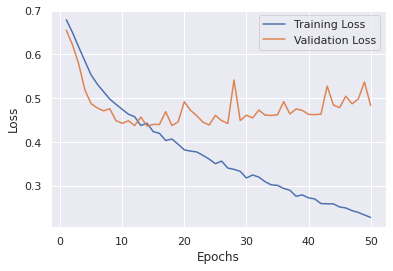

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_loss1 = model1_history.history['loss']
val_loss1 = model1_history.history['val_loss']

epochs = range(1, len(train_loss1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

These plots are demonstrating overfitting. Our validation loss reaches its minimum after around 12 epochs then it increases, while the training loss keeps decreasing until it reaches nearly 0. 



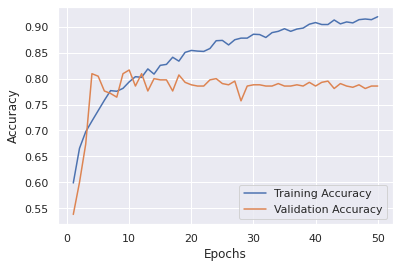

In [ ]:
train_acc1  = model1_history.history['accuracy']
val_acc1  = model1_history.history['val_accuracy']


plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Similarly the validation accuracy becomes compartively stalbe after 8 epochs. Whereas the training accuracy keeps on increasing. At the end of 50 epochs we get an accuracy of 91.94 percent on the training set and of 78.57 percent on the validation set. 

This shows that the model is facing the problem of overfitting.

**Part II -  Using transfer learning and data augmentation to improve the CNN **

Using one of the pre-trained models in Keras that has been trained on the ImageNet dataset (e.g., VGG16) as your convolutional base. Adding a densly-connected layer and an output layer with the same number of neurons and the same activation functions as in your previous model to this convolutional base. Making sure to freeze the convolutional base so that the pre-trained weights and biases do not change during the training process of the new densly-connected classifier. Compiling the model using `RMSProp` optimizer and use a learning rate of `0.00005`. Follow the `accuracy` metric during training. 

For data preprocessing, using the `ImageDataGenerator` tool in Keras. This time using the tool to do data augmentation.
Train your model for 100 epochs. 

When training is complete, plotting the training and validation loss and accuracy.

Comparing the validation loss and accuracy of the two models. 

Instantiating the VGG16 model:

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

Having a look at the details of the architecture of the VGG16 convolutional base.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

Adding a densely-connected classifier on top of this convolutional base. Flattening layer as the densely-connected layers only accept vectors as their input.

In [ ]:
model2 = models.Sequential()

model2.add(conv_base)

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

We are going to "freeze" the convolutional base so that its pre-trained weights and biases do not change during the training of our densely-connected classifier. 

In [ ]:
conv_base.trainable = False

Next, we use ImageDataGenerator as before to convert raw images into tensors that can be fed into our neural network. We also do data augmentation as we did in our previous model.

In [ ]:
# Define the data augmentation parameters in ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 1600 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Now we are ready to compile and train our model. 

In [ ]:

model2.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=0.00005),
               metrics=['accuracy'])

In [ ]:

model2_history = model2.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
50/50 [==============================] - 11s 222ms/step - loss: 0.6281 - accuracy: 0.6562 - val_loss: 0.6193 - val_accuracy: 0.6214
Epoch 2/100
50/50 [==============================] - 11s 215ms/step - loss: 0.5541 - accuracy: 0.7462 - val_loss: 0.5423 - val_accuracy: 0.7524
Epoch 3/100
50/50 [==============================] - 11s 215ms/step - loss: 0.5228 - accuracy: 0.7506 - val_loss: 0.5429 - val_accuracy: 0.7500
Epoch 4/100
50/50 [==============================] - 11s 218ms/step - loss: 0.5002 - accuracy: 0.7706 - val_loss: 0.5051 - val_accuracy: 0.7810
Epoch 5/100
50/50 [==============================] - 11s 215ms/step - loss: 0.4994 - accuracy: 0.7688 - val_loss: 0.5114 - val_accuracy: 0.7690
Epoch 6/100
50/50 [==============================] - 11s 215ms/step - loss: 0.4784 - accuracy: 0.7781 - val_loss: 0.4657 - val_accuracy: 0.7929
Epoch 7/100
50/50 [==============================] - 11s 215ms/step - loss: 0.4689 - accuracy: 0.7800 - val_loss: 0.4710 - val_accuracy:

Saving the model 

In [ ]:
model2.save("/covid19_ct/Covid_model2.h5")

Plotting the Training and Validation Loss

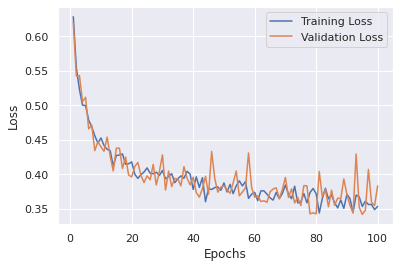

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc2  = model2_history.history['accuracy']
train_loss2 = model2_history.history['loss']
val_acc2  = model2_history.history['val_accuracy']
val_loss2 = model2_history.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Plotting the training and validation accuracy 

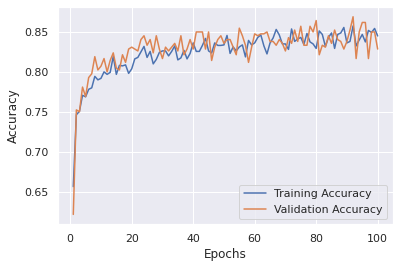

In [ ]:
plt.plot(epochs, train_acc2, label = 'Training Accuracy')
plt.plot(epochs, val_acc2, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As we can now see that the training and validation loss curves are close to each other. Also the Training and validation accuracy appear very close to one another. At the end of the final epoch we were able to achieve an accouracy of 84.50 percent for the training set and 82.86 percent for the validation set. Therefore the second model is not facing the problem of overfitting as that of the first model. 

From a validation accuracy of around 78 percent we have improved to a validation accuracy of 82 percent while also overcoming the problem of overfitting, so definitely the **second model** is the one we should be using for detecting COVID-19 from chest CT images.

We can also see the loss and accuracy of the validations sets for the models below which clearly show that model 2 performs much better. 

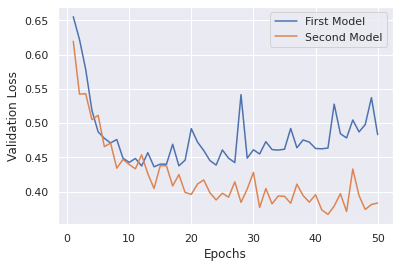

In [ ]:
epochs1 = range(1, len(train_acc1) + 1)
epochs2 = range(1, len(train_acc2) + 1)

plt.plot(epochs1, val_loss1, label = 'First Model')
plt.plot(epochs2[:50], val_loss2[:50], label = 'Second Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

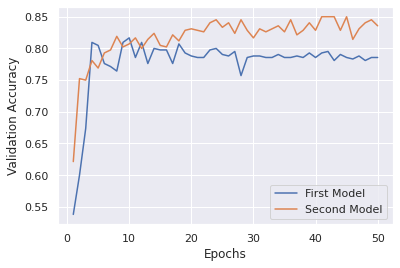

In [ ]:
plt.plot(epochs1, val_acc1, label = 'First Model')
plt.plot(epochs2[:50], val_acc2[:50], label = 'Second Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()